In [10]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:

# Load the dataset
file_path = './EV_Data.csv'
ev_data = pd.read_csv(file_path)

ev_data.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJSA1E22K,King,Seattle,WA,98112.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,43.0,202233958,POINT (-122.300312 47.629782),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,3MW39FS05R,Yakima,Zillah,WA,98953.0,2024,BMW,330E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,20,0,15.0,264425178,POINT (-120.2658133 46.4063477),PACIFICORP,5.307700e+10
2,1N4AZ0CP0F,King,Kent,WA,98031.0,2015,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84,0,11.0,114962025,POINT (-122.201564 47.402358),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
3,5YJSA1H20F,Snohomish,Bothell,WA,98012.0,2015,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,0,1.0,232724670,POINT (-122.206146 47.839957),PUGET SOUND ENERGY INC,5.306105e+10
4,JTMAB3FV1N,Yakima,Yakima,WA,98908.0,2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42,0,14.0,221023589,POINT (-120.611068 46.596645),PACIFICORP,5.307700e+10


In [5]:
# Count the total number of cars in the dataset
total_cars_count = ev_data.shape[0]

total_cars_count


191407

In [18]:
"There are 191,407 registered cars in this dataset."

'There are 191,407 registered cars in this dataset.'

In [17]:
# Count the number of cars for each make
make_counts = ev_data.groupby('Make').size().reset_index(name='Count').sort_values(by='Count', ascending=False)

# Display the result
print(make_counts)

                    Make  Count
36                 TESLA  84670
7              CHEVROLET  14321
28                NISSAN  14239
12                  FORD  10048
19                   KIA   8671
5                    BMW   7993
38                TOYOTA   7181
39            VOLKSWAGEN   5408
18                  JEEP   4996
16               HYUNDAI   4977
32                RIVIAN   4751
40                 VOLVO   4469
2                   AUDI   3890
8               CHRYSLER   3393
25         MERCEDES-BENZ   1784
30               PORSCHE   1182
27            MITSUBISHI    996
26                  MINI    984
35                SUBARU    970
29              POLESTAR    939
15                 HONDA    857
10                  FIAT    781
9                  DODGE    619
24                 MAZDA    581
21                 LEXUS    567
6               CADILLAC    552
22               LINCOLN    281
23                 LUCID    263
34                 SMART    259
17                JAGUAR    234
13      

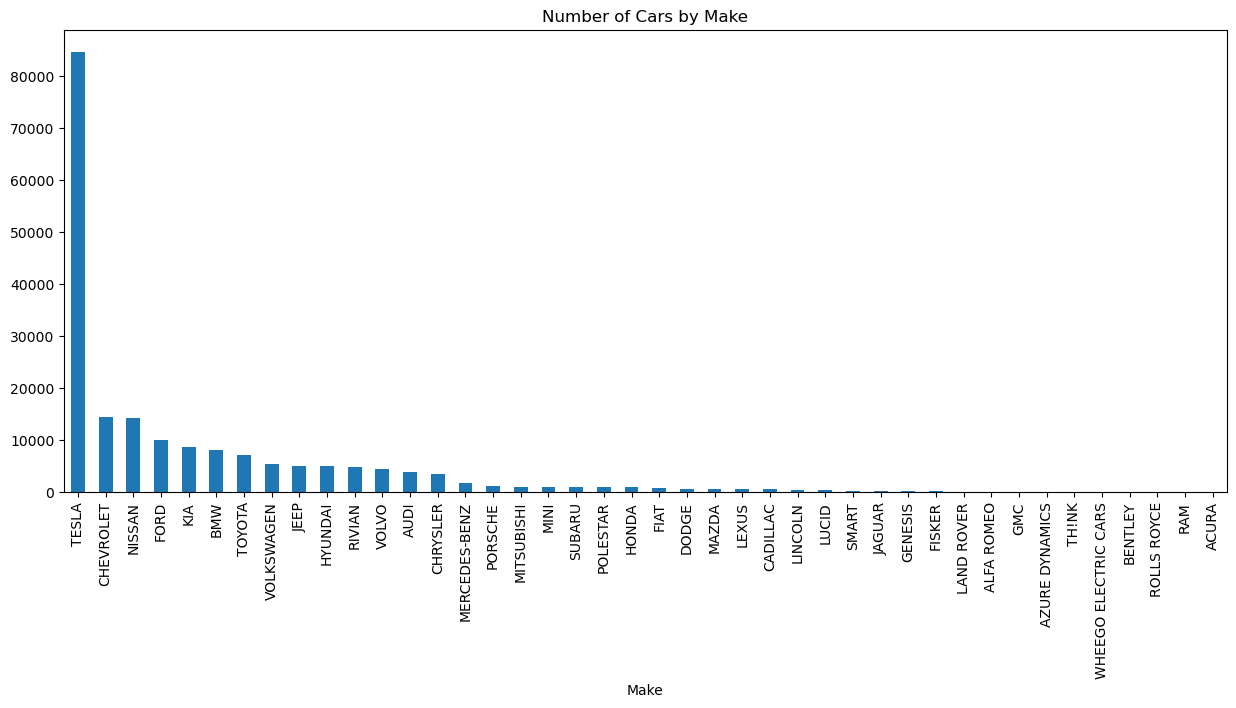

In [29]:
# Count the number of cars for each make
make_counts = ev_data['Make'].value_counts()

# Create a pie chart with percentages
plt.figure(figsize=(15, 6))
make_counts.plot(kind='bar')
plt.title('Number of Cars by Make')
plt.ylabel('')  # Remove the default 'Number of Cars' label
plt.show()

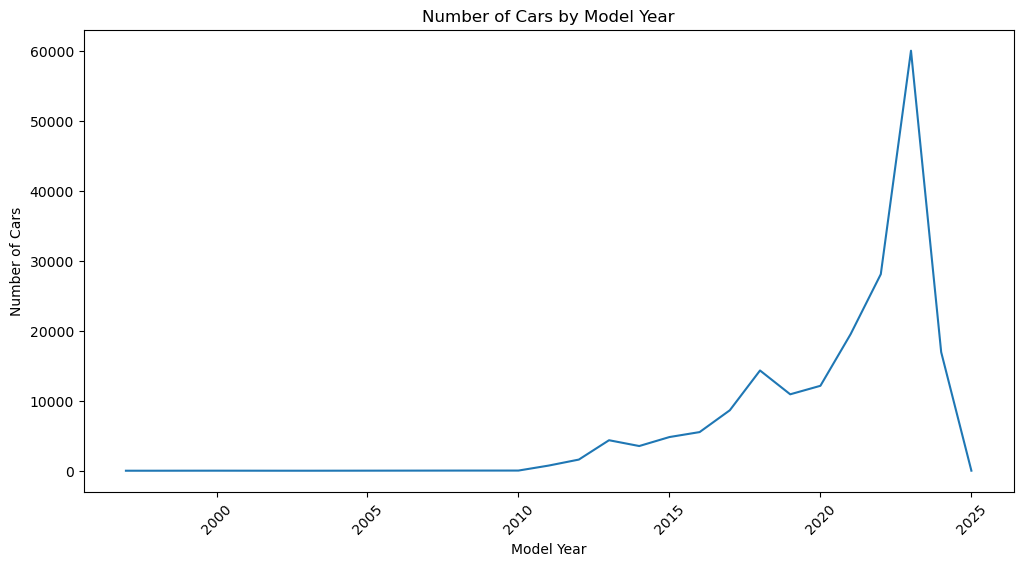

In [24]:

# Count the number of cars for each model year
model_year_counts = ev_data['Model Year'].value_counts().sort_index()

# Create a bar graph
plt.figure(figsize=(12, 6))
model_year_counts.plot(kind='line')
plt.title('Number of Cars by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Number of Cars')
plt.xticks(rotation=45)
plt.show()

In [4]:
# Count the number of Tesla cars in the dataset
tesla_count = ev_data.loc[ev_data['Make'] == 'TESLA'].shape[0]
print(f"Number of Tesla cars: {tesla_count}")

Number of Tesla cars: 84670


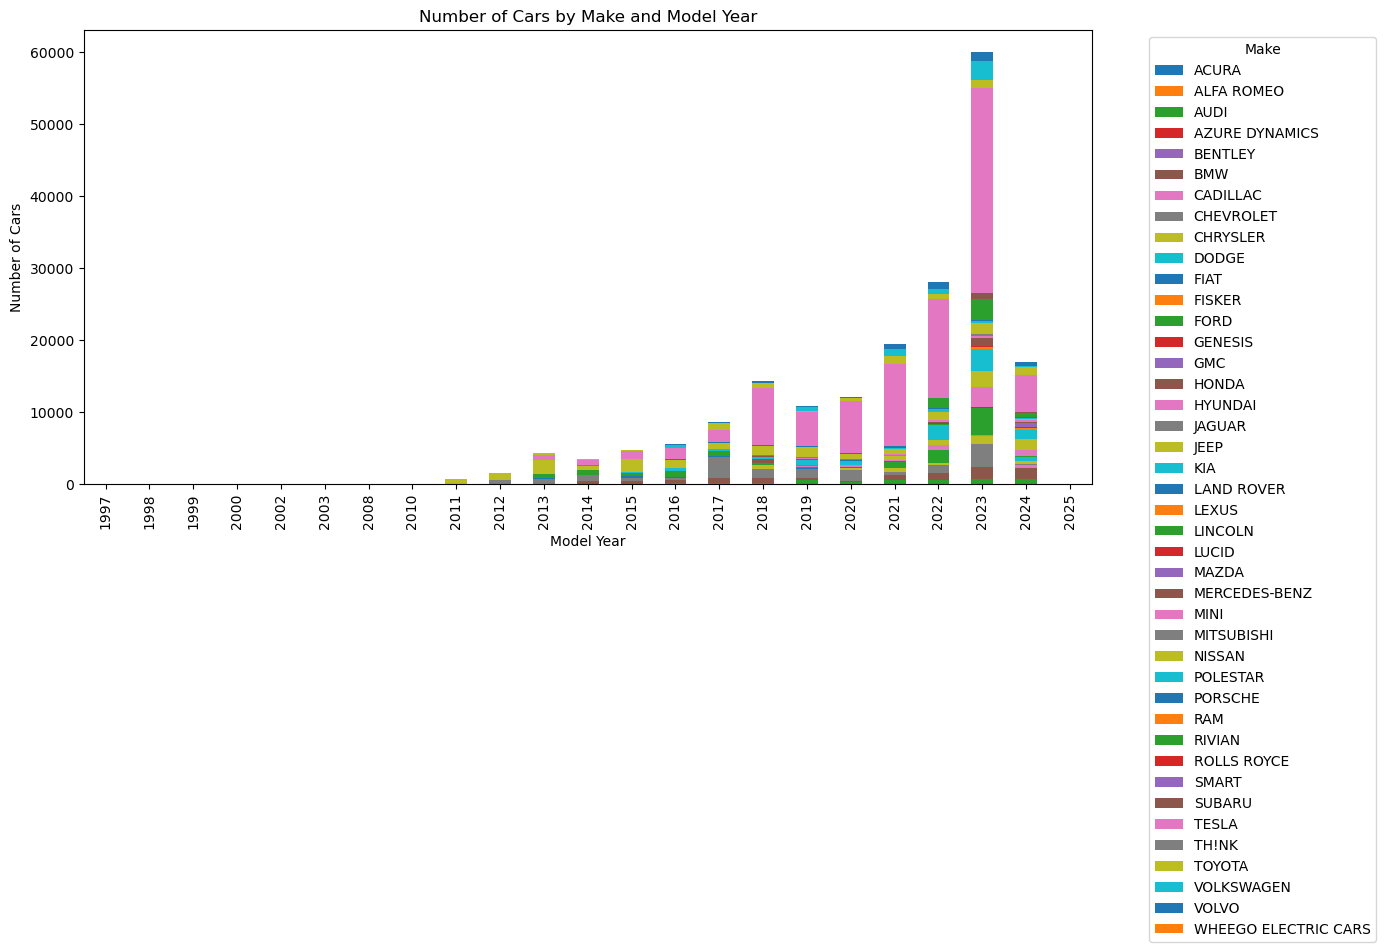

In [25]:
# Count the number of cars for each make and model year
make_model_year_counts = ev_data.groupby(['Model Year', 'Make']).size().unstack().fillna(0)

# Create a stacked bar chart
make_model_year_counts.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title('Number of Cars by Make and Model Year')
plt.xlabel('Model Year')
plt.ylabel('Number of Cars')
plt.legend(title='Make', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [37]:
# Group car registrations by county and count the number of registrations
county_counts = ev_data.groupby('County').size().reset_index(name='Count').sort_values(by='Count', ascending=False)

county_counts.head(30)

,County,Count
85,King,99076
165,Snohomish,22643
131,Pierce,14932
33,Clark,11335
177,Thurston,6969
87,Kitsap,6303
168,Spokane,5015
188,Whatcom,4602
15,Benton,2351
163,Skagit,2076


In [ ]:
# Group car registrations by county and count the number of registrations
county_counts = ev_data.groupby('County').size().reset_index(name='Count').sort_values(by='Count', ascending=False)

county_dict = {
    
}